# QUESTION:1

In [24]:
#STEP: 1,2,3
import pandas as pd

users = pd.read_csv('user.csv',sep='|')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# Step 4. Discover what is the mean age per occupation

In [37]:
users[['occupation','age']].groupby('occupation').mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


# Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [38]:
users.head()
df = users[['gender','occupation']]
male = df.loc[df['gender'] == 'M']
total = df.groupby('occupation').count()
male = male.groupby('occupation').count()
ratio = male / total
ratio.sort_values(by='gender', ascending=False)

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


# Step 6. For each occupation, calculate the minimum and maximum ages

In [40]:
users.head()
df = users[['age','occupation']]
df.groupby('occupation').min()


,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22
entertainment,15
executive,22
healthcare,22
homemaker,20


In [41]:
df.groupby('occupation').max()

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70
entertainment,50
executive,69
healthcare,62
homemaker,50


# Step 7. For each combination of occupation and sex, calculate the mean age

In [48]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 8. For each occupation present the percentage of women and men

In [49]:
df = users[['occupation','gender']]
df.groupby('occupation').gender.value_counts(normalize=True)*100

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
educator       M          72.631579
               F          27.368421
engineer       M          97.014925
               F           2.985075
entertainment  M          88.888889
               F          11.111111
executive      M          90.625000
               F           9.375000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         M          83.333333
               F          16.666667
librarian      F          56.862745
               M          43.137255
marketing      M          61.538462
               F          38.461538
none           M          55.555556
               F          44.444444
other          M          65.714286
               F          34.285714
progra

# QUESTION:2

In [50]:
# STEP 1,2,3
import pandas as pd
import numpy as np
euro12 = pd.read_csv('Euro.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Step 4. Select only the Goal column

In [51]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


# Step 5. How many team participated in the Euro2012?

In [52]:
len(euro12.Team.unique())

16

# Step 6. What is the number of columns in the dataset?

In [53]:
euro12.shape[1]

35

# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline


In [54]:
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [55]:
discipline.sort_values(['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


# Step 9. Calculate the mean Yellow Cards given per Team

In [56]:
discipline[['Team','Yellow Cards']].groupby('Team').mean()

,Yellow Cards
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0
Netherlands,5.0


# Step 10. Filter teams that scored more than 6 goalsStep.


In [57]:
data_goals=euro12[euro12['Goals']>=6]
data_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#  11. Select the teams that start with G.

In [58]:

data_goals[data_goals['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17


# Step 12. Select the first 7 columns

In [59]:
euro12.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Step 13. Select all columns except the last 3

In [60]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [62]:
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# QUESTION: 3

In [64]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np
import random

# Step 2. Create 3 differents Series, each of length 100

In [67]:
first = pd.Series(np.random.randint(1,4,100))
second = pd.Series(np.random.randint(1,3,100))
third = pd.Series(np.random.randint(10000,30000,100))

# Step 3. Create a DataFrame by joinning the Series by column

In [69]:
ds = pd.concat([first,second,third],axis=1)
ds

,0,1,2
0,2,1,12088
1,1,1,21977
2,3,2,23920
3,2,2,17074
4,3,1,21377
...,...,...,...
95,3,1,21233
96,1,2,23566
97,3,1,11892
98,2,1,28015


# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [74]:
ds.columns = ['bedrs','bathrs','price_sqr_meter']
ds.head(10)

,bedrs,bathrs,price_sqr_meter
0,2,1,12088
1,1,1,21977
2,3,2,23920
3,2,2,17074
4,3,1,21377
5,3,1,15651
6,3,1,24762
7,3,1,20167
8,2,1,23765
9,2,1,24887


# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [71]:
bigcolumn = pd.concat([first,second,third],axis=0)
bigcolumn

0         2
1         1
2         3
3         2
4         3
      ...  
95    21233
96    23566
97    11892
98    28015
99    29465
Length: 300, dtype: int32

# Step 6. Ops it seems it is going only until index 99. Is it true?

In [72]:
len(bigcolumn)

300

# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [73]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          2
1          1
2          3
3          2
4          3
       ...  
295    21233
296    23566
297    11892
298    28015
299    29465
Length: 300, dtype: int32

# QUESTION:4

In [75]:
# STEP 1,2
import pandas as pd
wind = pd.read_csv('wind.txt', delimiter='\s+')
wind

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [77]:

wind.rename(columns={'Yr':'Year','Mo':"Month","Dy":"Day"}, inplace=True)
wind

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [78]:
wind['Year'] += 1900
wind

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [79]:
wind.index = pd.to_datetime(pd.concat([wind['Year'], wind['Month'], wind['Day']], axis=1))
wind.drop(['Year','Month','Day'], axis=1, inplace=True)
wind

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [80]:
wind.isnull().sum().sum()

31

# Step 7. Compute how many non-missing values there are in total.

In [81]:
wind.notnull().sum().sum()

78857

# step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [82]:
wind.mean().mean()

10.227982360836924

In [83]:
wind[:24]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-09,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
1961-01-10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [84]:
loc_stats = pd.concat([wind.mean(), wind.min(), wind.max(), wind.std()], axis=1)
loc_stats.rename(columns={0:'Mean',1:'Min',2:'Max',3:'Std'}, inplace=True)
loc_stats

,Mean,Min,Max,Std
RPT,12.362987,0.67,35.80,5.618413
VAL,10.644314,0.21,33.37,5.267356
ROS,11.660526,1.50,33.84,5.008450
KIL,6.306468,0.00,28.46,3.605811
SHA,10.455834,0.13,37.54,4.936125
BIR,7.092254,0.00,26.16,3.968683
DUB,9.797343,0.00,30.37,4.977555
CLA,8.495053,0.00,31.08,4.499449
MUL,8.493590,0.00,25.88,4.166872
CLO,8.707332,0.04,28.21,4.503954


# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [85]:
day_stats = pd.concat([wind.mean(axis=1), wind.min(axis=1), wind.max(axis=1), wind.std(axis=1)], axis=1)
day_stats.rename(columns={0:'Mean',1:'Min',2:'Max',3:'Std'}, inplace=True)
day_stats

,Mean,Min,Max,Std
1961-01-01,13.018182,9.29,18.50,2.808875
1961-01-02,11.336364,6.50,17.54,3.188994
1961-01-03,11.641818,6.17,18.50,3.681912
1961-01-04,6.619167,1.79,11.75,3.198126
1961-01-05,10.630000,6.17,13.33,2.445356
...,...,...,...,...
1978-12-27,16.708333,8.08,40.08,7.868076
1978-12-28,15.150000,5.00,41.46,9.687857
1978-12-29,14.890000,8.71,29.58,5.756836
1978-12-30,15.367500,9.13,28.79,5.540437


# Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.

In [86]:
jan = wind[wind.index.month == 1]
jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

# Step 12. Downsample the record to a yearly frequency for each location.

In [87]:
yearly = wind.resample('Y').ffill()
yearly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41
1970-12-31,8.38,0.37,9.59,2.62,1.75,0.08,4.83,2.13,2.54,1.17,3.67,7.21


# Step 13. Downsample the record to a monthly frequency for each location.

In [88]:
monthly = wind.resample('M').ffill()
monthly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67
1978-11-30,15.34,4.54,14.75,3.50,4.54,4.96,7.50,2.42,4.96,3.75,4.92,11.50


# Step 14. Downsample the record to a weekly frequency for each location.

In [89]:
weekly = wind.resample('W').ffill()
weekly

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08
1978-12-24,8.67,5.63,12.12,4.79,5.09,5.91,12.25,9.25,10.83,11.71,11.92,31.71


# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [126]:
weekly_stats = weekly[:52]
weekly_stats = pd.concat([weekly_stats.mean(), weekly_stats.max(), weekly_stats.mean(), weekly_stats.std()], axis=1)
weekly_stats.rename(columns={0:'Mean',1:'Max',2:'Mean',3:'Std'},inplace=True)
weekly_stats

,Mean,Max,Mean,Std
RPT,12.140000,25.80,12.140000,5.360926
VAL,10.626538,23.91,10.626538,4.782553
ROS,11.261731,22.42,11.261731,4.714533
KIL,6.862549,17.54,6.862549,3.743912
SHA,11.242745,24.08,11.242745,4.770084
BIR,7.946346,19.70,7.946346,3.906412
DUB,9.912353,22.00,9.912353,4.695142
CLA,9.305385,20.25,9.305385,4.022109
MUL,8.823077,21.46,8.823077,4.181664
CLO,9.939615,20.04,9.939615,4.077699


# QUESTION: 5

In [91]:
# STEP 1,2,3
import pandas as pd
import numpy as np
chipo = pd.read_csv('ques-5.txt', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Step 4. See the first 10 entries

In [92]:
chipo.head(10)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5. What is the number of observations in the dataset?

In [93]:
chipo.shape[0]

4622

# Step 6. What is the number of columns in the dataset?

In [94]:
chipo.shape[1]

5

# Step 7. Print the name of all the columns.

In [95]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

# Step 8. How is the dataset indexed?

In [96]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

# Step 9. Which was the most-ordered item?

In [97]:
chipo.item_name.value_counts().head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

# Step 10. For the most-ordered item, how many items were ordered?

In [98]:
chipo.item_name.unique().shape[0]

50

# Step 11. What was the most ordered item in the choice_description column?

In [99]:
chipo.choice_description.value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

# Step 12. How many items were orderd in total?

In [100]:
chipo.quantity.sum()

4972

# Step 13

In [101]:
def item_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(item_float)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [102]:
chipo.item_price.dtype

dtype('float64')

# Step 14. How much was the revenue for the period in the dataset?

In [104]:
chipo.item_price.sum()

34500.16

# Step 15. How many orders were made in the period?

In [105]:
chipo.order_id.value_counts().count()

1834

# Step 16. What is the average revenue amount per order?

In [106]:
chipo.item_price.mean()

7.464335785374397

# Step 17. How many different items are sold?

In [108]:
chipo.item_name.value_counts().count()

50

# QUESTION:6

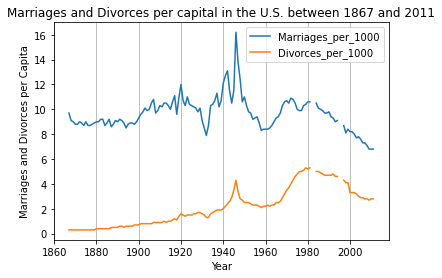

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('marrg-div.csv')

df.plot(x='Year', y=['Marriages_per_1000', 'Divorces_per_1000'])

plt.title('Marriages and Divorces per capital in the U.S. between 1867 and 2011')

plt.ylabel('Marriages and Divorces per Capita')
plt.xlabel('Year')

plt.grid(axis='x')
plt.show()

# QUESTION: 7

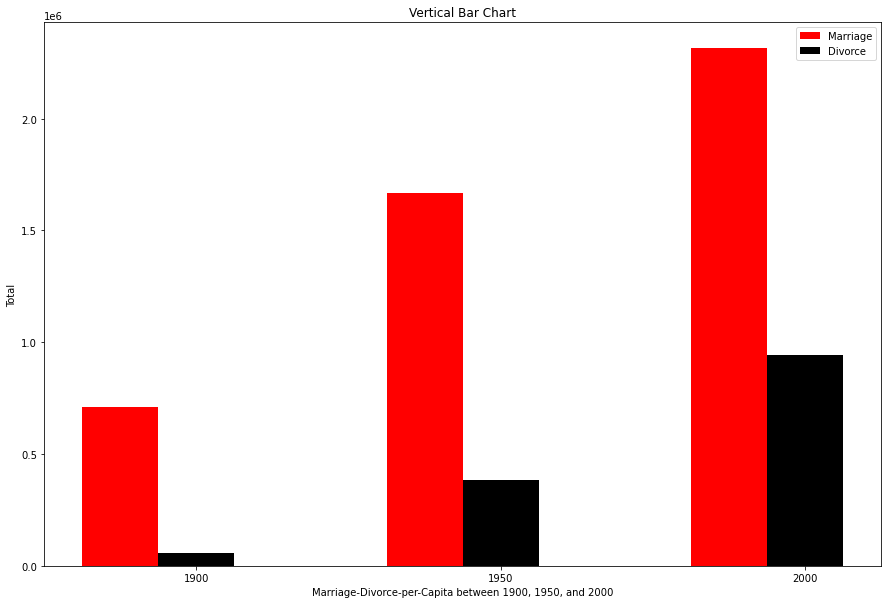

In [113]:

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 10])

marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

X = np.arange(len(marriage))

plt.bar(X, marriage, color = 'red', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'black', width = 0.25)

plt.legend(['Marriage', 'Divorce'])

plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])

plt.title("Vertical Bar Chart")
plt.xlabel('Marriage-Divorce-per-Capita between 1900, 1950, and 2000')
plt.ylabel('Total')

plt.show()


# QUESTION: 8

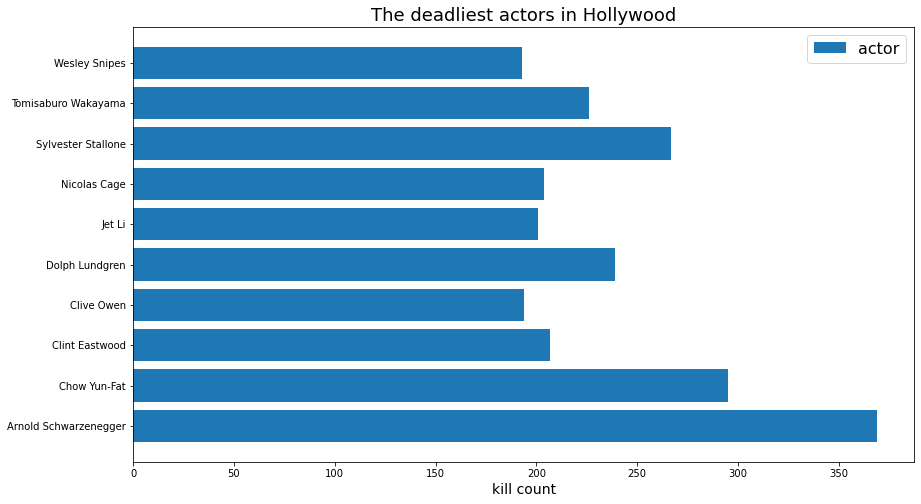

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dead_actors = pd.read_csv('actor_kill_counts.csv')
actors = dead_actors['Actor']
killCount = dead_actors['Count']
dead_actors = plt.figure(figsize=(14,8))
dead_actors = plt.barh(actors, killCount, label='actor')
#dead_actors = plt.barh(killCount, width=0.5, labe;='kill Count')
dead_actors = plt.title("The deadliest actors in Hollywood", fontsize=18)
dead_actors = plt.xlabel("kill count", fontsize=14)
dead_actors = plt.legend(fontsize = 16, loc = "upper right")
dead_actors

# QUESTION: 9

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv('roman-emperor-reigns.csv')
nw_df = df.groupby("Cause_of_Death")['Emperor'].count()

Text(0.5, 1.0, "Roman Emperor's Cause of Death")

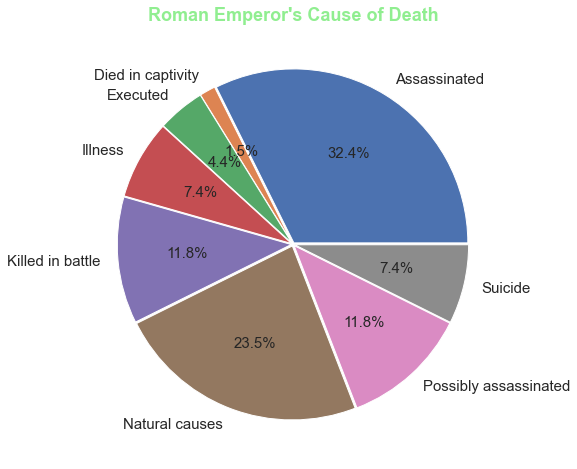

In [146]:
nw_df.plot.pie(autopct="%.1f%%", figsize = (8,8) , fontsize = 15, ylabel = '', explode=[0.01]*8)
plt.title("Roman Emperor's Cause of Death", color = 'Lightgreen', fontsize = 18, fontweight ='bold')

# QUESTION: 10

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', index_col=0)

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

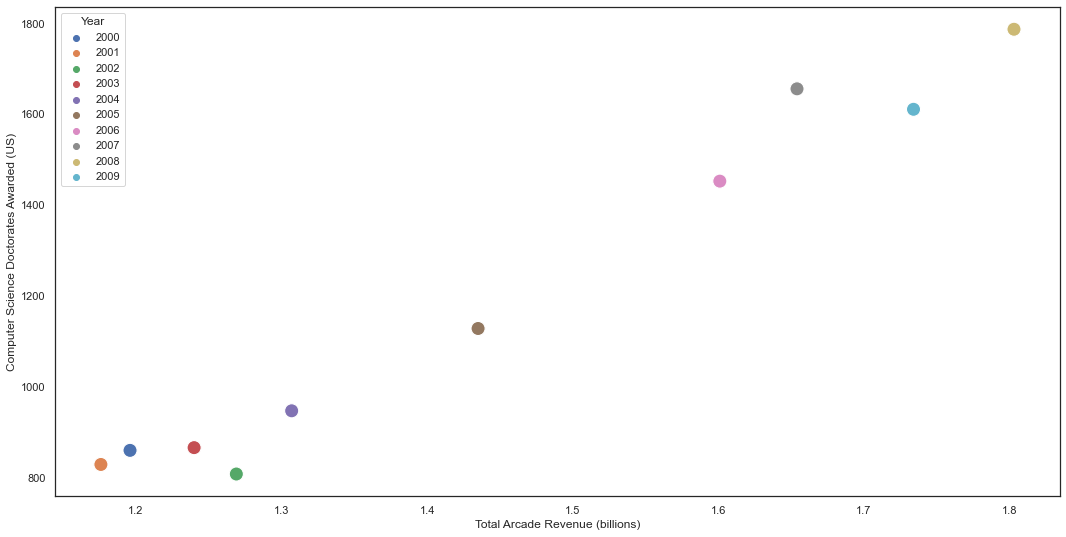

In [148]:
sns.set(rc = {'figure.figsize':(18,9)})
sns.set_theme(style="white")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', 
                hue='Year', data=revenue, palette="deep",s=200)